## 1. Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import joblib
import warnings
warnings.filterwarnings('ignore')

## 2. Loading & Analyzing dataset

In [8]:
movies_df = pd.read_csv('../data/movies_dataset.csv')

##### First analysis of the dataset

In [9]:
movies_df.describe().iloc[:, :5]

,1,2,3,4,5
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,1.140000,0.130000,0.010000,0.648889,0.264444
std,1.964144,0.708908,0.107668,1.476259,0.964320
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,2.000000,5.000000,5.000000


##### Checking datatypes

In [10]:
print(movies_df.drop(['title'], axis=1).dtypes.unique())

[dtype('float64')]


##### Checking for null values

In [11]:
movies_df.isnull().sum()

title    0
1        0
2        0
3        0
4        0
        ..
606      0
607      0
608      0
609      0
610      0
Length: 607, dtype: int64

##### Getting all unique rating values

In [12]:
all_ratings = movies_df.iloc[:, 1:].values.flatten()

unique_ratings = pd.Series(all_ratings).unique()
print(f"All unique rating values: \n{sorted(unique_ratings)}")

All unique rating values: 
[0.0, 0.5, 1.0, 1.5, 2.0, 2.25, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


##### Checking the most common ratings, we can see that most of the movies are not rated

In [13]:
# Calculate the count of each rating value
rating_counts = pd.Series(all_ratings).value_counts().sort_index()

print(rating_counts)

0.00    231340
0.50       374
1.00       778
1.50       397
2.00      2087
2.25         1
2.50      1583
3.00      7321
3.50      4946
4.00     11998
4.50      4238
5.00      7637
Name: count, dtype: int64


##### Plotting the above observation

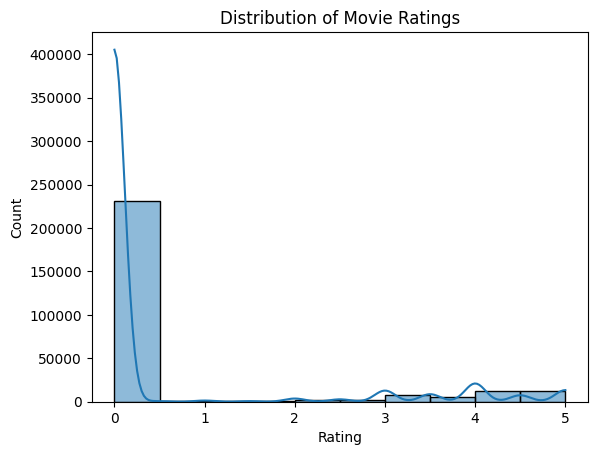

In [14]:
sns.histplot(all_ratings, bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


## 3. Creating Model

In [15]:
training_df = movies_df.drop(['title'], axis=1)

##### Value of k can be changed in accordance with the number of movie recommendations needed

In [16]:
k = 4

##### Using kNN with cosine similarity because it works well when the matrices are sparse, like in our case

In [17]:
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')  # Using cosine similarity
knn_model.fit(training_df)

NearestNeighbors(metric='cosine', n_neighbors=4)

## 3. Checking Results

##### Function to output k neighbours for each movie inputted

In [18]:
def recommend_movies(model, title, df):
    movie_idx = df[df['title'] == title].index[0]
    _, idx = model.kneighbors([df.drop(['title'], axis=1).iloc[movie_idx]])
    print(f'Top {k-1} recommendations for {title} are:') 
    for i in range(1, len(idx[0])):
        print(f'{i} - {df.iloc[idx[0][i]].title}')

##### As we can see, our model is giving fairly accurate recommendations

In [19]:
recommend_movies(knn_model, 'Harry Potter and the Chamber of Secrets (2002)', movies_df)

Top 3 recommendations for Harry Potter and the Chamber of Secrets (2002) are:
1 - Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
2 - Harry Potter and the Prisoner of Azkaban (2004)
3 - Harry Potter and the Goblet of Fire (2005)


In [20]:
recommend_movies(knn_model, 'Lord of the Rings: The Fellowship of the Ring, The (2001)', movies_df)

Top 3 recommendations for Lord of the Rings: The Fellowship of the Ring, The (2001) are:
1 - Lord of the Rings: The Return of the King, The (2003)
2 - Lord of the Rings: The Two Towers, The (2002)
3 - Pirates of the Caribbean: The Curse of the Black Pearl (2003)


## 4. Exporting the Model

In [21]:
joblib.dump(knn_model, '../saved models/movie_model.pkl')

['../saved models/movie_model.pkl']